In [58]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Layer

In [84]:
x = np.expand_dims(np.random.random(100), axis=1)
y = 2 * x + 5

In [108]:
class simpleDense(Layer):
  def __init__(self, units=1):
    super(simpleDense, self).__init__()
    self.units=units
  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name='kernel', initial_value=w_init(shape=(input_shape[-1],self.units),dtype='float32'), trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name='bias', initial_value=b_init(shape=(self.units),dtype='float32'), trainable=True)
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

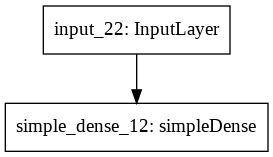

In [117]:
#Define model
input = Input(shape=(1))
output = simpleDense(1)(input)
model = Model(inputs=input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.01), loss='mse', metrics=['mse'])
plot_model(model)

In [118]:
model.fit(x, y, epochs=600, verbose=0)

In [119]:
model.predict([10])

array([[25.073557]], dtype=float32)

In [120]:
model.get_weights()

[array([[2.0067372]], dtype=float32), array([5.006186], dtype=float32)]